Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
 Classes détectées : {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


C:\Users\pc\anaconda3\newAnaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 544s 188ms/step - accuracy: 0.5804 - loss: 1.1329 - val_accuracy: 0.5966 - val_loss: 1.0650
Epoch 2/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 102s 35ms/step - accuracy: 0.5741 - loss: 1.1309 - val_accuracy: 0.5976 - val_loss: 1.0624
Epoch 3/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 98s 34ms/step - accuracy: 0.5836 - loss: 1.1086 - val_accuracy: 0.5982 - val_loss: 1.0576
Epoch 4/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 109s 38ms/step - accuracy: 0.5854 - loss: 1.1115 - val_accuracy: 0.5955 - val_loss: 1.0608
Epoch 5/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 124s 43ms/step - accuracy: 0.5878 - loss: 1.0950 - val_accuracy: 0.6008 - val_loss: 1.0551
Epoch 6/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 125s 43ms/step - accuracy: 0.5816 - loss: 1.1071 - val_accuracy: 0.6008 - val_loss: 1.0554
Epoch 7/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 139s 48ms/step - accuracy: 0.5755 - loss: 1.1119 - val_accuracy: 0.5961 - val_loss: 1.0578
Epoch 8/20
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 139s 47ms/step - accuracy: 

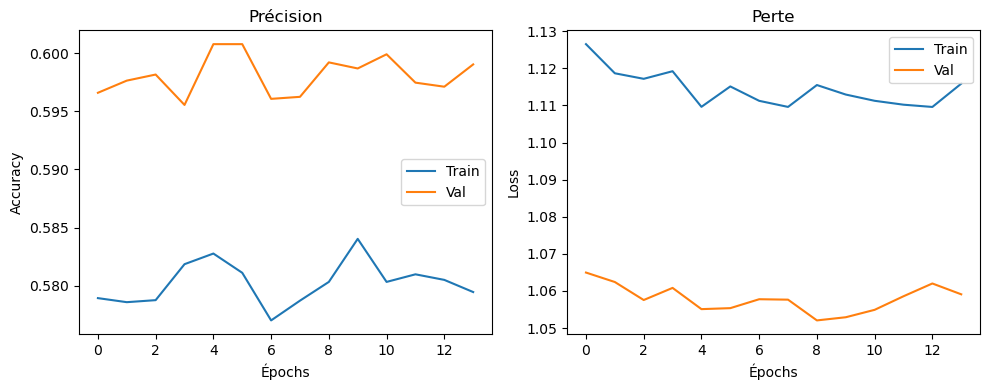

Modèle fine-tuné sauvegardé dans : model/emotion_model_finetuned_v2.h5


In [1]:
# Étape 1 : Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt

# Étape 2 : Paramètres
img_size = (48, 48)
batch_size = 8
base_model_path = 'model/emotion_model.h5'
custom_data_path = 'dataset/train'  # Chemin corrigé vers les sous-dossiers d’émotions

# Étape 3 : Prétraitement
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% entraînement et 20% validation
)

# Générateurs d'images
train_gen = datagen.flow_from_directory(
    custom_data_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    custom_data_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Vérification des classes détectées
print(" Classes détectées :", train_gen.class_indices)

# Étape 4 : Charger le modèle de base
model = load_model(base_model_path)

# Étape 5 : Dégeler uniquement les dernières couches
for layer in model.layers[:-2]:
    layer.trainable = False

# Étape 6 : Compilation
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Étape 7 : Entraînement avec EarlyStopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)

# Étape 8 : Visualisation des courbes
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Précision")
plt.xlabel("Épochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Perte")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Étape 9 Sauvegarde du nouveau modèle
os.makedirs('model', exist_ok=True)
model.save('model/emotion_model_finetuned_v2.h5')
print("Modèle fine-tuné sauvegardé dans : model/emotion_model_finetuned_v2.h5")
